BrainWave Matrix Solutions(Task1)

In [ ]:
##Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"C:\Users\udayk\Desktop\DEEPTHI\Brainwave Matrix\Online Sales Data.csv")
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
##Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
##Checking the null values
print(data.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [6]:
##Basic statistics for numerical columns
print(data.describe())

       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


In [7]:
# Examine unique values for categorical columns
print(data['Product Category'].unique())
print(data['Region'].unique())
print(data['Payment Method'].unique())

['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']
['North America' 'Europe' 'Asia']
['Credit Card' 'PayPal' 'Debit Card']


In [8]:
# data cleaning
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Verify integrity of 'Total Revenue'
data['Calculated Revenue'] = data['Units Sold'] * data['Unit Price']
data['Revenue Match'] = data['Calculated Revenue'] == data['Total Revenue']
print(data['Revenue Match'].value_counts())

# Drop the 'Calculated Revenue' and 'Revenue Match' columns after verification
data = data.drop(columns=['Calculated Revenue', 'Revenue Match'])

Revenue Match
True     231
False      9
Name: count, dtype: int64


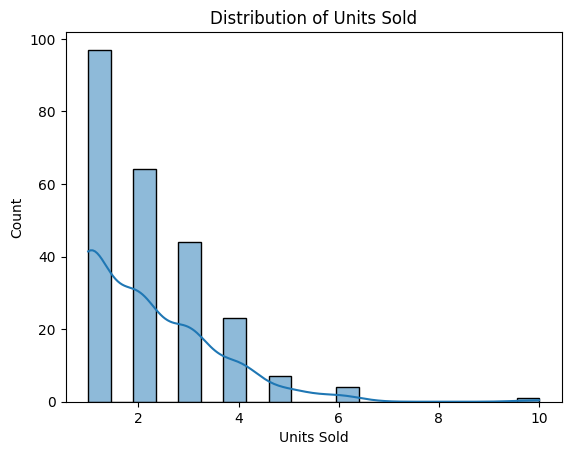

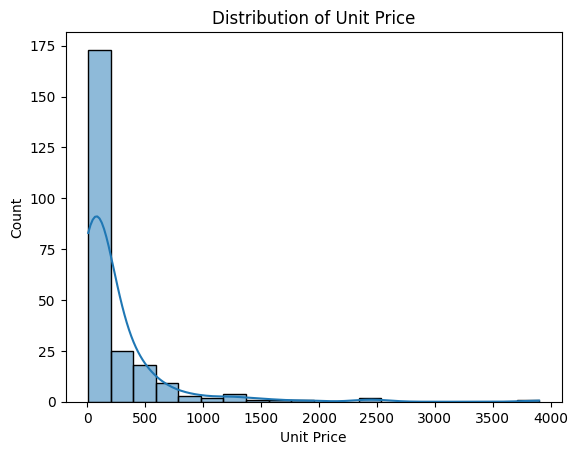

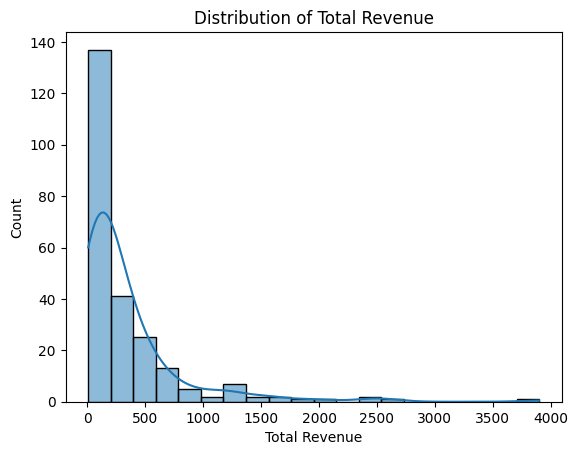

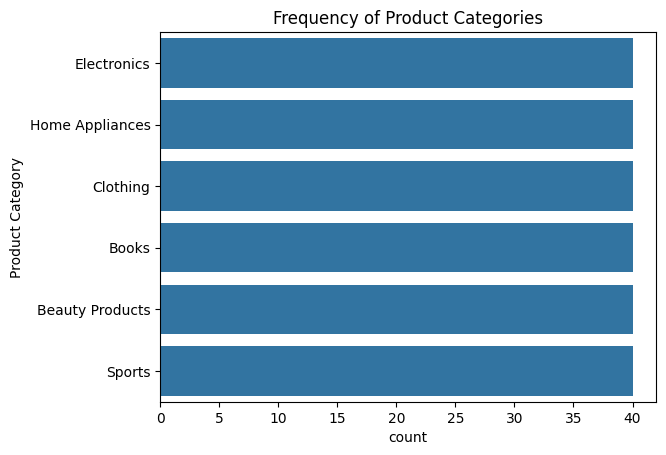

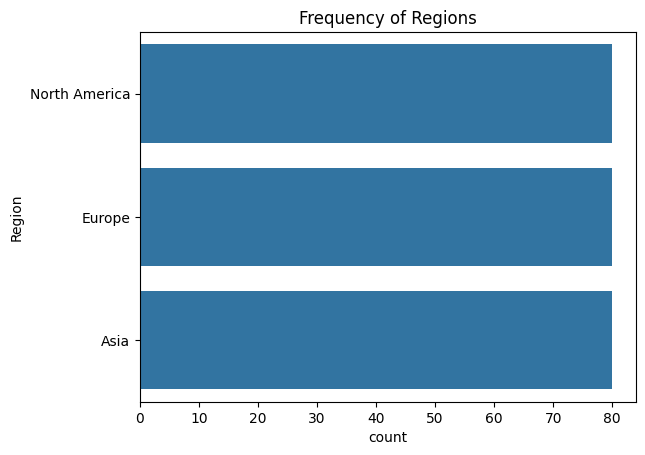

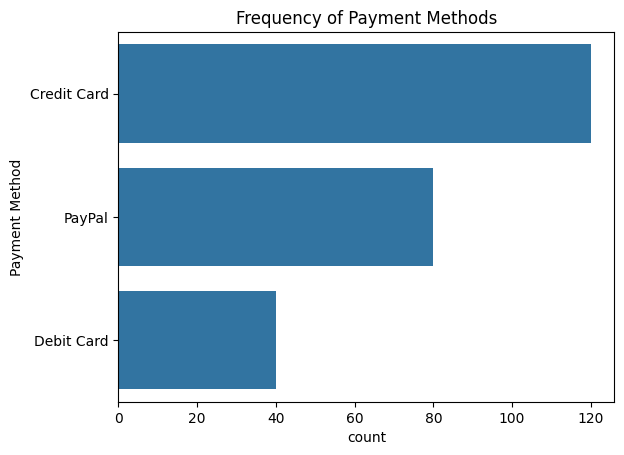

In [ ]:
# Distribution of numerical columns
sns.histplot(data['Units Sold'], bins=20, kde=True)
plt.title('Distribution of Units Sold')
plt.show()
sns.histplot(data['Unit Price'], bins=20, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

sns.histplot(data['Total Revenue'], bins=20, kde=True)
plt.title('Distribution of Total Revenue')
plt.show()

# Frequency of categorical columns
sns.countplot(y='Product Category', data=data, order=data['Product Category'].value_counts().index)
plt.title('Frequency of Product Categories')
plt.show()

sns.countplot(y='Region', data=data, order=data['Region'].value_counts().index)
plt.title('Frequency of Regions')
plt.show()

sns.countplot(y='Payment Method', data=data, order=data['Payment Method'].value_counts().index)
plt.title('Frequency of Payment Methods')
plt.show()

C:\Users\udayk\AppData\Local\Temp\ipykernel_35164\2743784725.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('Date').resample('M')['Total Revenue'].sum().plot()


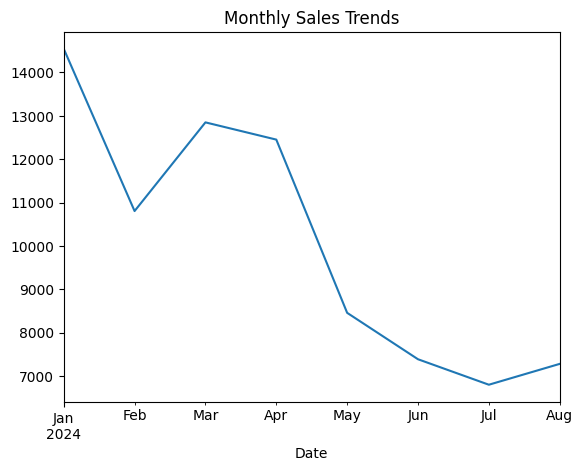

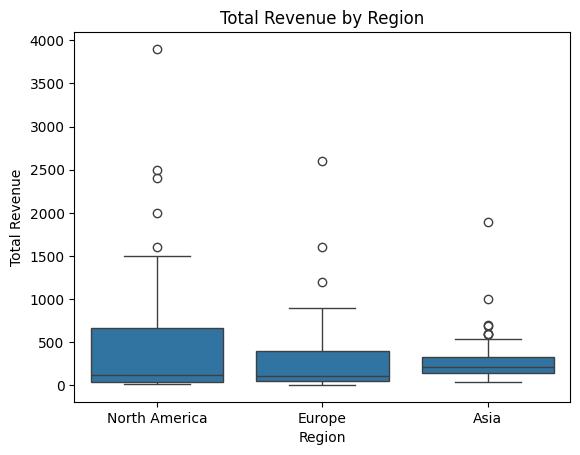

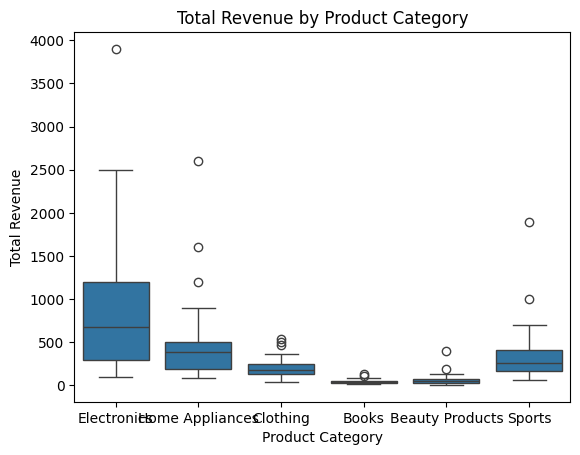

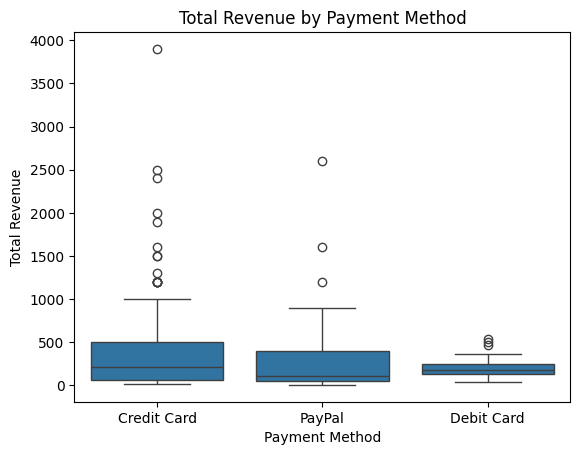

In [33]:

# Sales trends over time
data.set_index('Date').resample('M')['Total Revenue'].sum().plot()
plt.title('Monthly Sales Trends')
plt.show()

# Sales distribution across different regions and product categories
sns.boxplot(x='Region', y='Total Revenue', data=data)
plt.title('Total Revenue by Region')
plt.show()

sns.boxplot(x='Product Category', y='Total Revenue', data=data)
plt.title('Total Revenue by Product Category')
plt.show()

# Impact of payment methods on sales volume and revenue
sns.boxplot(x='Payment Method', y='Total Revenue', data=data)
plt.title('Total Revenue by Payment Method')
plt.show()

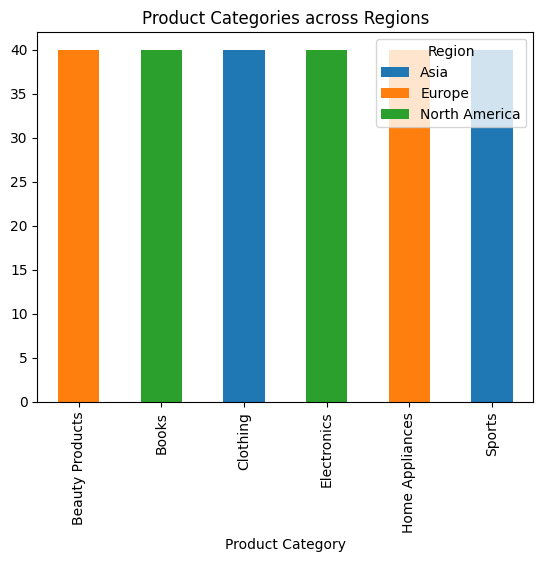

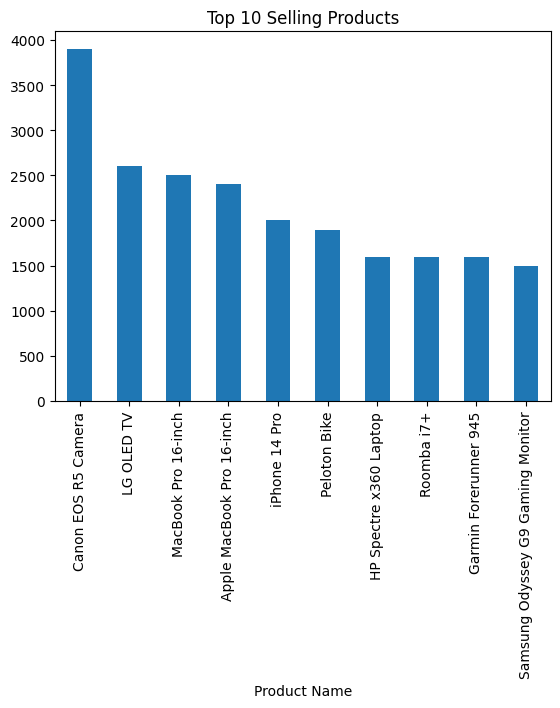

In [34]:
# Relationship between product categories and regions
pd.crosstab(data['Product Category'], data['Region']).plot(kind='bar', stacked=True)
plt.title('Product Categories across Regions')
plt.show()

# Top-selling products within each category
top_selling_products = data.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.show()